In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

HCP_DIR = "./hcp"
# The data shared for NMA projects is a subset of the full HCP dataset
N_SUBJECTS = 339

# The data have already been aggregated into ROIs from the Glasser parcellation
N_PARCELS = 360

# The acquisition parameters for all tasks were identical
TR = 0.72  # Time resolution, in seconds

# The parcels are matched across hemispheres with the same order
HEMIS = ["Right", "Left"]

# Each experiment was repeated twice in each subject
N_RUNS = 2
regions = np.load(f"{HCP_DIR}/regions.npy").T
region_info = dict(
    name=regions[0].tolist(),
    network=regions[1],
    hemi=['Right']*int(N_PARCELS/2) + ['Left']*int(N_PARCELS/2),
)

In [10]:
betasWin = np.load('betasAverageWin.npy')
betasLoss = np.load('betasAverageLoss.npy')


In [11]:
NumberofSubjects = 339
one = np.ones(NumberofSubjects)
zero = np.zeros(NumberofSubjects)

In [12]:
import math
subjectsTrainforWins = math.floor(NumberofSubjects*0.8) 
subjectsTrainforLoss = subjectsTrainforWins
X_trainWins = betasWin[:subjectsTrainforWins]
y_trainWins = one[:subjectsTrainforWins]

X_testWins = betasWin[subjectsTrainforWins:]
y_testWins = one[subjectsTrainforWins:]


X_trainLoss = betasLoss[:subjectsTrainforLoss]
y_trainLoss = zero[:subjectsTrainforLoss]

X_testLoss = betasLoss[subjectsTrainforLoss:]
y_testLoss = zero[subjectsTrainforLoss:]


X_train = np.concatenate((X_trainWins,X_trainLoss))

y_train = np.concatenate((y_trainWins,y_trainLoss))

X_test = np.concatenate((X_testWins,X_testLoss))
y_test = np.concatenate((y_testWins,y_testLoss))

print(f'X_train shape is {X_train.shape}\nX_test shape is {X_test.shape} \ny_train shape is {y_train.shape} \ny_test shape is {y_test.shape}')

X_train shape is (542, 360)
X_test shape is (136, 360) 
y_train shape is (542,) 
y_test shape is (136,)


In [19]:
scaler_X = StandardScaler()
f_transformer = scaler_X.fit(X_train)

X_train = f_transformer.transform(X_train)
X_test = f_transformer.transform(X_test)

In [24]:
logisticRegr = LogisticRegression(max_iter = 1000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.8308823529411765


In [30]:
predictions = logisticRegr.predict(X_test)
ConfusionMatrix = metrics.confusion_matrix(y_test, predictions)
print(ConfusionMatrix)

[[56 12]
 [11 57]]


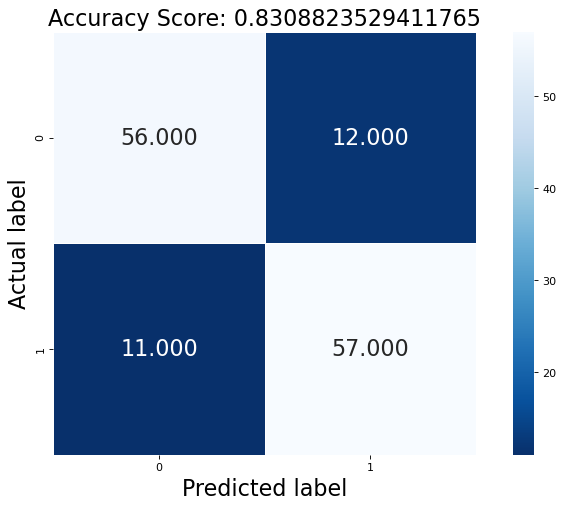

In [40]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure

figure(figsize=(12, 7), dpi=80)

sns.heatmap(ConfusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',annot_kws={"size": 20}) ;
plt.ylabel('Actual label' , size = 20);
plt.xlabel('Predicted label' , size = 20);
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 20);

<Figure size 960x560 with 0 Axes>

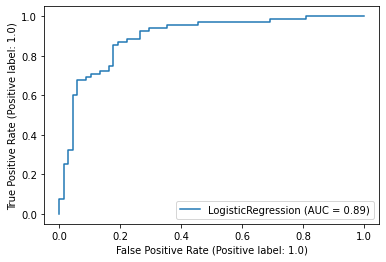

In [42]:
from sklearn import metrics
metrics.plot_roc_curve(logisticRegr , X_test, y_test)
plt.show()

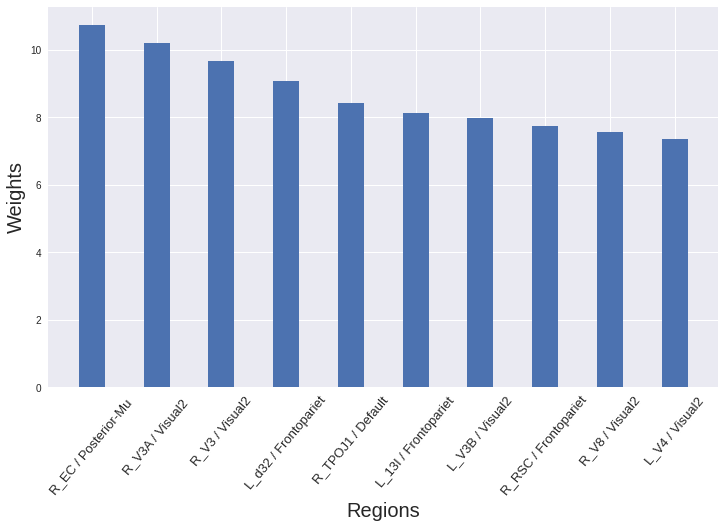

In [63]:
weights = np.ravel(logisticRegr.coef_)
weights = weights*10
regionsWights = regions[0]
plt.style.use('seaborn')

indices = (-weights).argsort()[:10]
plt.figure(figsize = (12,7))
plt.ylabel('Weights' , size = 20);
plt.xlabel('Regions' , size = 20);

plt.bar(regionsX, weights[indices] , width = 0.4)
plt.tick_params(axis='x', rotation=50)
plt.xticks(fontsize=13)
plt.show()




In [27]:
regions[1][indices]

array(['Posterior-Mu', 'Visual2', 'Visual2', 'Frontopariet', 'Default',
       'Frontopariet', 'Visual2', 'Frontopariet', 'Visual2', 'Visual2'],
      dtype='<U12')

In [49]:
regionsX = ['R_EC / Posterior-Mu ' , 'R_V3A / Visual2 ' , 'R_V3 / Visual2' , 'L_d32 / Frontopariet' , 'R_TPOJ1 / Default' , 'L_13I / Frontopariet' , 'L_V3B / Visual2' , 'R_RSC / Frontopariet' , 'R_V8 / Visual2' , 'L_V4 / Visual2']

In [28]:
542/2

271.0

In [29]:
339-271

68